<a href="https://colab.research.google.com/github/bjpark-forest/2023-1-Intro-DataScience/blob/main/14%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%EB%B0%95%EB%B4%89%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습

## KNeighborsClassifier 사용법

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# 빈칸

x_train = [[0], [1], [2], [3]]
y_train = [0, 0, 1, 1]

neigh = KNeighborsClassifier(n_neighbors=5)
                             # 빈칸
neigh.fit(x_train, y_train) # 빈칸

print(f'클래스의 종류:{neigh.classes_}')
print(f'거리계산방법:{neigh.effective_metric_}')
print(f'훈련데이터 샘플 수:{neigh.n_samples_fit_}')

클래스의 종류:[0 1]
거리계산방법:euclidean
훈련데이터 샘플 수:4


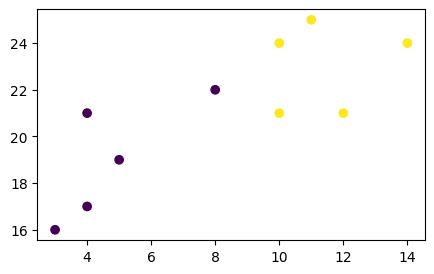

In [ ]:
#원두맛에 대한 데이터 생성
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier# 빈칸

x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12] 
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.figure(figsize=(5,3))
plt.scatter(x, y, c=classes)
plt.show()

## 최적의 K 값

In [ ]:
data = list(zip(x, y))
print(data)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)]


[0]


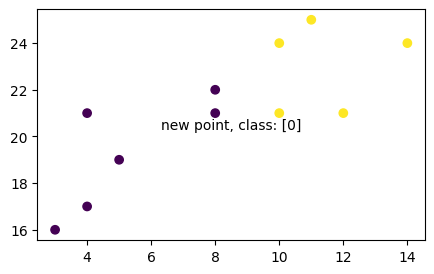

In [ ]:
#k=1
knn = KNeighborsClassifier(n_neighbors=1) # 빈칸
knn.fit(data, classes)

new_x = 8
new_y = 21
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
print(prediction)

plt.figure(figsize=(5,3))
plt.scatter(x+[new_x], y+[new_y], c=classes+[prediction])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction}")
plt.show()

[1]


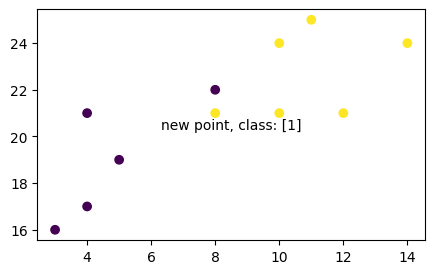

In [ ]:
#k=5
knn = KNeighborsClassifier(n_neighbors=5)# 빈칸
knn.fit(data, classes)
prediction = knn.predict(new_point)
print(prediction)

plt.figure(figsize=(5,3))
plt.scatter(x+[new_x], y+[new_y], c=classes+[prediction])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction}")
plt.show()

In [ ]:
#교차검증으로 k찾기
from sklearn.model_selection import cross_val_score # 빈칸

knn = KNeighborsClassifier()# 빈칸
scores = cross_val_score(knn, data, classes, cv=3, scoring='accuracy') # 빈칸

for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 1.0
2번째 정확도: 1.0
3번째 정확도: 0.6666666666666666


- k가 1과 2일 때는 정확도가 1이고, 3일 경우 0.6으로 떨어지는 것을 알 수 있다.
- 따라서 k를 홀수인 1로 결정할 수 있으나 일반적으로 k=1로 결정하게 되면 과적합이 될 수 있기에 k=3부터 홀수 개씩 탐색 (일반적으로 k는 홀수 개로 정하는데, 다수결 원칙에 기반한 분류 결과를 도출하기 위함)

## 표준화 작업

In [ ]:
# 표준화 예제 데이터 생성
import pandas as pd
import numpy as np

df = pd.DataFrame({'A' : np.arange(11), 'B' : np.arange(11) ** 2})
df

,A,B
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64
9,9,81


In [ ]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler# 빈칸
standardScaler = StandardScaler() # 빈칸

df_standardScaled = standardScaler.fit_transform(df)# 빈칸

pd.DataFrame(df_standardScaled, columns = ['A_std', 'B_std'])

,A_std,B_std
0,-1.581139,-1.066004
1,-1.264911,-1.035546
2,-0.948683,-0.944175
3,-0.632456,-0.791888
4,-0.316228,-0.578688
5,0.000000,-0.304572
6,0.316228,0.030457
7,0.632456,0.426401
8,0.948683,0.883260
9,1.264911,1.401033


In [ ]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler# 빈칸
minmaxScaler = MinMaxScaler()# 빈칸

df_minmaxScaled = minmaxScaler.fit_transform(df)# 빈칸
pd.DataFrame(df_minmaxScaled, columns = ['A_minmax', 'B_minmax'])

,A_minmax,B_minmax
0,0.0,0.00
1,0.1,0.01
2,0.2,0.04
3,0.3,0.09
4,0.4,0.16
5,0.5,0.25
6,0.6,0.36
7,0.7,0.49
8,0.8,0.64
9,0.9,0.81


## K-NN을 이용한 인기 영화 분류

In [ ]:
#11.2 드라마분류하기
df=pd.read_csv('chap11_movie_genre_final.csv')

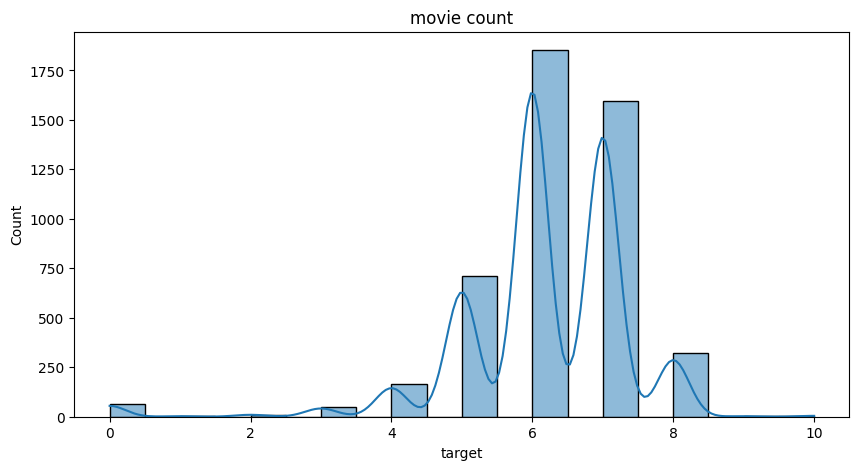

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore") # 경고 메시지 무시

plt.figure(figsize = (10 , 5)) #그래프사이즈
#sns.distplot(df['target'] , bins = 20) #빈 수치를 20으로 설정
sns.histplot(df['target'] , bins = 20, kde=True) #빈 수치를 20으로 설정

plt.title("movie count")
plt.show()

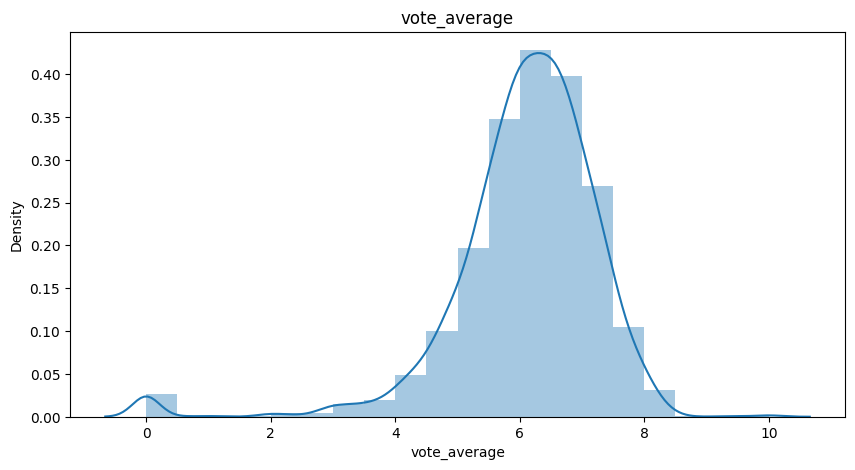

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 5)) #그래프사이즈
sns.distplot(df['vote_average'] , bins = 20) #빈 수치를 20으로 설정

plt.title("vote_average")
plt.show()

In [ ]:
genre_list = df.columns[4:24].tolist()
#genre_list=['Action', 'Adventure','Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation','Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery','History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie']
count_list = df[genre_list].sum().tolist()  

for i in range(len(genre_list)):
  print(f'{genre_list[i]} : {count_list[i]}')

Action : 1140
Adventure : 786
Fantasy : 421
ScienceFiction : 535
Crime : 691
Drama : 2281
Thriller : 1270
Animation : 232
Family : 512
Western : 81
Comedy : 1714
Romance : 891
Horror : 518
Mystery : 347
History : 191
War : 143
Music : 184
Documentary : 110
Foreign : 33
TVMovie : 8


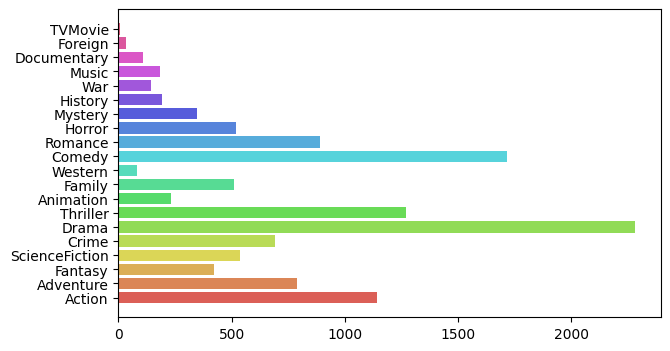

In [ ]:
plt.figure(figsize = (7,4)) #그래프사이즈
plt.barh(genre_list, count_list, color=sns.color_palette('hls', 20))   # 빈칸   )
plt.show()

In [ ]:
temp = (df.Drama==True) & (df.vote_average>=6.5)
print(f'드라마 장르 영화 {df.Drama.sum()}편 중 평점 6.5 이상:{len(df[temp])}편')

드라마 장르 영화 2281편 중 평점 6.5 이상:1208편


In [ ]:
temp = (df.Comedy==True) & (df.vote_average>=6.5)
print(f'드라마 장르 영화 {df.Comedy.sum()}편 중 평점 6.5 이상:{len(df[temp])}편')

드라마 장르 영화 1714편 중 평점 6.5 이상:521편


In [ ]:
temp = (df.Thriller==True) & (df.vote_average>=6.5)
print(f'드라마 장르 영화 {df.Thriller.sum()}편 중 평점 6.5 이상:{len(df[temp])}편')

드라마 장르 영화 1270편 중 평점 6.5 이상:415편


In [ ]:
temp = (df.Action==True) & (df.vote_average>=6.5)
print(f'드라마 장르 영화 {df.Action.sum()}편 중 평점 6.5 이상:{len(df[temp])}편')

드라마 장르 영화 1140편 중 평점 6.5 이상:355편


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
#x =df[['Action', 'Adventure', 'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie']]
genre_list = ['Action', 'Adventure', 'Fantasy', 'ScienceFiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign', 'TVMovie']# 빈칸
x=df[genre_list]
y=df[['target']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)# 빈칸
print(x_train.shape)
print(x_test.shape)

(3820, 20)
(955, 20)


In [ ]:
knn = KNeighborsClassifier()# 빈칸
scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')# 빈칸

for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 0.38219895287958117
2번째 정확도: 0.4096858638743455
3번째 정확도: 0.36387434554973824
4번째 정확도: 0.38612565445026176
5번째 정확도: 0.3743455497382199


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)# 빈칸
neigh.fit(x_train, y_train) # 빈칸
print(neigh.classes_)
print(f'거리계산방법: {neigh.effective_metric_}')
print(f'샘플수: {neigh.n_samples_fit_}')

[ 0  1  2  3  4  5  6  7  8  9 10]
거리계산방법: euclidean
샘플수: 3820


In [ ]:
print(neigh.score(x_test,y_test))

0.4031413612565445


In [ ]:
new_x = [1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]

prediction = neigh.predict([new_x])
prediction

array([6])

-  0.36 정도의 정확도를 가지고 있다는 것과 액션이면서 스릴러 장르의 영화는 인기 정도가 6인 영화로 분류됨

## K-NN을 이용한 농구 선수 분류

In [ ]:
#11.3 농구선수 분류
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
import pandas as pd
df=pd.read_csv('chap11_basketball_final.csv')
df.head()

,Rebounds,Assists,Steals,Blocks,Turnovers,Target
0,4.1,1.9,0.4,0.4,1.3,0
1,2.4,3.7,1.1,0.5,1.6,0
2,2.2,1.0,0.5,0.3,1.0,0
3,1.9,0.8,0.6,0.1,1.0,1
4,2.5,0.3,0.3,0.4,0.8,1


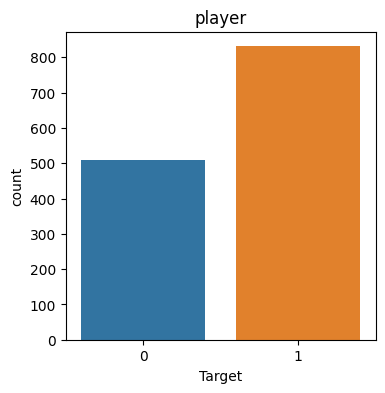

In [ ]:
#경력별 선수의 수
plt.figure(figsize=(4,4)) #그래프사이즈
sns.countplot(x='Target', data=df) 
plt.title("player")
plt.show()

In [ ]:
#경력에 따른 농구 기술
print(f"{df['Rebounds'].groupby(df['Target']).mean()}\n")
print(f"{df['Assists'].groupby(df['Target']).mean()}\n")
print(f"{df['Steals'].groupby(df['Target']).mean()}\n")
print(f"{df['Blocks'].groupby(df['Target']).mean()}\n")
print(f"{df['Turnovers'].groupby(df['Target']).mean()}\n")

Target
0    2.247544
1    3.516486
Name: Rebounds, dtype: float64

Target
0    1.221022
1    1.752347
Name: Assists, dtype: float64

Target
0    0.498232
1    0.692178
Name: Steals, dtype: float64

Target
0    0.253438
1    0.439110
Name: Blocks, dtype: float64

Target
0    0.942240
1    1.347533
Name: Turnovers, dtype: float64



In [ ]:
#훈련데이터와 테스트데이터 분리
x=df[['Rebounds','Assists','Steals','Blocks','Turnovers']]
y=df['Target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)# 빈칸
print(x_train.shape)
print(x_test.shape)

(1072, 5)
(268, 5)


In [ ]:
#최적의 k찾기
knn = KNeighborsClassifier()# 빈
scores = cross_val_score(knn,x, y, cv=7, scoring='accuracy') # 빈칸

for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 0.671875
2번째 정확도: 0.6197916666666666
3번째 정확도: 0.5989583333333334
4번째 정확도: 0.581151832460733
5번째 정확도: 0.5863874345549738
6번째 정확도: 0.6282722513089005
7번째 정확도: 0.6544502617801047


In [ ]:
#모델 생성과 학습
neigh = KNeighborsClassifier(n_neighbors=7)# 빈칸
neigh.fit(x_train, y_train) # 빈칸
print(neigh.classes_)
print(f'거리계산방법: {neigh.effective_metric_}')
print(f'샘플수: {neigh.n_samples_fit_}')

[0 1]
거리계산방법: euclidean
샘플수: 1072


In [ ]:
print(neigh.score(x_test,y_test))
new_x = [3,3,2,2,4]
prediction = neigh.predict([new_x])
print(prediction)

0.5783582089552238
[1]


- 학습모델 성능은 0.62의 정확도를 가짐
- 리바운드 3, 어시스트 3, 스틸 2, 블록 2, 턴오버 4회는 5년 이상 경력(1)으로 분류

# 연습문제

###문제3
- 다음은 K-NN 학습모델 생성하고 값 예측하는 코드이다. 빈칸을 완선하시오.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # 빈칸

x = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]

neigh = KNeighborsClassifier(n_neighbors=3)# 빈칸 (n_neighbors=3)
neigh.fit(x, y)
print(neigh.predict([[1.1]]))

[0]


###문제4
- 다음은 사이킷런에서 제공하는 당뇨병 환자 데이터를 읽어와 K-NN 알고리즘을 적용할 때 최적의 k를 찾는 코드이다. 빈칸을 완성하시오.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn import datasets

diabetes = datasets.load_diabetes()

x = diabetes.data[:150]
y = diabetes.target[:150]

knn = KNeighborsClassifier()
cv = ShuffleSplit(n_splits=3, test_size=0.5, random_state=42)
scores = cross_val_score(knn, x, y, cv=cv, scoring='accuracy')

for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 0.0
2번째 정확도: 0.013333333333333334
3번째 정확도: 0.0


###문제5
- 전복 데이터셋을 이용하여 최적의 k를 구하는 빈칸은 완성하시오.

In [ ]:
import pandas as pd
df = pd.read_csv('chap11_전복나이예측.csv')

In [ ]:
df.head()

,Diameter,Height,Whole_Weight,Viscra_Weight,Shell_Weight,Group
0,0.525,0.195,1.3700,0.2955,0.407,2.0
1,0.275,0.095,0.2170,0.0435,0.090,1.0
2,0.470,0.165,0.9975,0.2420,0.330,0.0
3,0.450,0.140,1.0130,0.2160,0.360,0.0
4,0.380,0.135,0.6810,0.1420,0.170,0.0


In [ ]:
df.columns

Index(['Diameter', 'Height', 'Whole_Weight', 'Viscra_Weight', 'Shell_Weight',
       'Group'],
      dtype='object')

In [ ]:
x=df[['Diameter', 'Height', 'Whole_Weight', 'Viscra_Weight', 'Shell_Weight']]
y=df['Group']

knn = KNeighborsClassifier()
scores = cross_val_score(knn, x, y, cv=5, scoring='accuracy' ) # 빈칸

for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 0.9950248756218906
2번째 정확도: 0.9900497512437811
3번째 정확도: 0.98
4번째 정확도: 0.985
5번째 정확도: 0.99


###문제6
- 다음은 유튜버 평균 나이와 평균 먹방 장면 횟수를 분류한 데이터셋으로 K-NN 학습모델을 생성하고 성능 결과를 출력하는 코드이다. 빈칸은 완성하시오.
- 힐링: a, 직업체험: b, 먹방: c

In [ ]:
import pandas as pd
df = pd.read_csv('chap11_유튜브장르.csv')
df.head()

,유튜버평균나이,먹방장면,장르
0,46.0,0.1750,a
1,44.0,0.1750,a
2,42.0,0.1625,a
3,41.0,0.1875,a
4,45.0,0.1750,a


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x=df[['유튜버평균나이','먹방장면']]
y=df['장르']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)# 빈칸
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy')# 빈칸

for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 0.7083333333333334
2번째 정확도: 0.9166666666666666
3번째 정확도: 0.75
4번째 정확도: 0.7083333333333334
5번째 정확도: 0.7083333333333334


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)# 빈칸 (n_neighbors=3)
neigh.fit(x_train, y_train) # 빈칸
print(f'정확도 : {neigh.score(x_test,y_test)}')

정확도 : 0.6


###문제7
- 다음은 순수이익(income)과 총지출비용(cost)으로 상권을 분류한 데이터셋으로 K-NN 학습모델을 생성하고 성능 결과를 출력하는 코드이다. 빈칸은 완성하시오.

In [ ]:
import pandas as pd
df=pd.read_csv('chap11_상권분류.csv')
df.head()

,income,cost,label
0,2850735,12120296344,3
1,3146942,8976116500,1
2,2774214,6175425196,2
3,2561943,1609692543,0
4,3001401,10437230074,1


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x = df[['income','cost']]
y = df['label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # 빈칸
knn = KNeighborsClassifier()# 빈칸
scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='accuracy' ) # 빈칸

for i in range(scores.size):
    print(f"{i+1}번째 정확도: {scores[i]}")

1번째 정확도: 1.0
2번째 정확도: 1.0
3번째 정확도: 0.99977079990832
4번째 정확도: 1.0
5번째 정확도: 1.0


In [ ]:
neigh = KNeighborsClassifier()# 빈칸
neigh.fit(x_train, y_train) # 빈칸
print(f'정확도 : {neigh.score(x_test,y_test)}')

정확도 : 1.0
